<a href="https://colab.research.google.com/github/arijit-max/BankingBot/blob/main/MobileNet_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/qcmwprpxf6tsqsy/LungCancerCNN.zip?dl=0

--2022-11-16 07:51:04--  https://www.dropbox.com/s/qcmwprpxf6tsqsy/LungCancerCNN.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/qcmwprpxf6tsqsy/LungCancerCNN.zip [following]
--2022-11-16 07:51:05--  https://www.dropbox.com/s/raw/qcmwprpxf6tsqsy/LungCancerCNN.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4729d1b059fd11ea3847e56000.dl.dropboxusercontent.com/cd/0/inline/Bw0jFHg6SsD_hActnoxqfk_42R6RRYyetHdmKyDMRNF9eDU_g_w4P4CFC3vCx_7Jm5cEvyVNouUzyCT-Is6CeWg31qXiDR6ed8nEUWLqZSrQ5zbxq5thBRjo2ZvW4Q4e0016NPu_euvwFGTz2mqVmS2hhi99s97BAIcsIVyH0vVWiQ/file# [following]
--2022-11-16 07:51:05--  https://uc4729d1b059fd11ea3847e56000.dl.dropboxusercontent.com/cd/0/inline/Bw0jFHg6SsD_hActnoxqfk_42R6RRYyetHdmKyDMRNF9eDU_g_w4P4CFC

In [ ]:
!unzip /content/LungCancerCNN.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: LungCancer/lung_aca/lungaca1.jpeg  
  inflating: LungCancer/lung_aca/lungaca10.jpeg  
  inflating: LungCancer/lung_aca/lungaca100.jpeg  
  inflating: LungCancer/lung_aca/lungaca1000.jpeg  
  inflating: LungCancer/lung_aca/lungaca1001.jpeg  
  inflating: LungCancer/lung_aca/lungaca1002.jpeg  
  inflating: LungCancer/lung_aca/lungaca1003.jpeg  
  inflating: LungCancer/lung_aca/lungaca1004.jpeg  
  inflating: LungCancer/lung_aca/lungaca1005.jpeg  
  inflating: LungCancer/lung_aca/lungaca1006.jpeg  
  inflating: LungCancer/lung_aca/lungaca1007.jpeg  
  inflating: LungCancer/lung_aca/lungaca1008.jpeg  
  inflating: LungCancer/lung_aca/lungaca1009.jpeg  
  inflating: LungCancer/lung_aca/lungaca101.jpeg  
  inflating: LungCancer/lung_aca/lungaca1010.jpeg  
  inflating: LungCancer/lung_aca/lungaca1011.jpeg  
  inflating: LungCancer/lung_aca/lungaca1012.jpeg  
  inflating: LungCancer/lung_aca/lungaca1013.jpeg  
  inflating: LungCan

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [ ]:
ROOT_DIR = "/content/LungCancer"
numberOfImages = {}

for dir in os.listdir(ROOT_DIR):
  numberOfImages[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)) )

In [ ]:
numberOfImages.items()

dict_items([('lung_aca', 5000), ('lung_nor', 5000)])

#Splitting the Dataset

In [ ]:
def dataFolder(p, split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size= (math.floor(split*numberOfImages[dir])-5),
                                  replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print("Folder exists")

In [ ]:
dataFolder("train",0.7)

In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

In [ ]:
numberOfImages = {}

for dir in os.listdir(ROOT_DIR):
  numberOfImages[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)) )

In [ ]:
numberOfImages.items()

dict_items([('lung_aca', 15), ('lung_nor', 15)])

#Importing Libraries

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2,preprocessing_function=preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 6990 images belonging to 2 classes.


In [ ]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory = path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [ ]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 1490 images belonging to 2 classes.


In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 1490 images belonging to 2 classes.


#Model Training

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input
import keras

In [39]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

In [40]:
for layer in base_model.layers:
  layer.trainable = False


In [41]:
X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, X)

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [43]:
model.compile(optimizer='rmsprop', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [44]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, verbose=1, patience=3)

cb = [mc,es]

In [45]:
hist = model.fit_generator(train_data, steps_per_epoch=8,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=16,
                           callbacks=cb)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.1491 - accuracy: 0.9219
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to bestmodel.h5
8/8 [==============================] - 9s 1s/step - loss: 0.1491 - accuracy: 0.9219 - val_loss: 3.4636e-07 - val_accuracy: 1.0000
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 2.5766e-06 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
8/8 [==============================] - 7s 886ms/step - loss: 2.5766e-06 - accuracy: 1.0000 - val_loss: 2.4754e-07 - val_accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 3.2868e-07 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 1.00000
8/8 [==============================] - 7s 922ms/step - loss: 3.2868e-07 - accuracy: 1.0000 - val_loss: 6.5039e-08 - val_accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 2.0126e-07 - accuracy: 1.0000
Epoch 4: val_accuracy did not im

In [46]:
model = load_model("/content/bestmodel.h5")

In [47]:
acc = model.evaluate_generator(test_data)[1]

print(f"Model Accuracy is {acc*100}%")

Model Accuracy is 100.0%


In [48]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

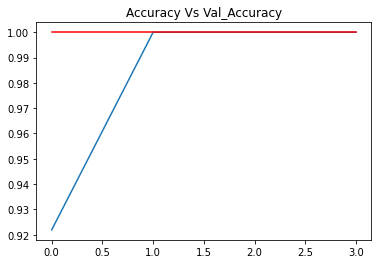

In [49]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('Accuracy Vs Val_Accuracy')
plt.show()

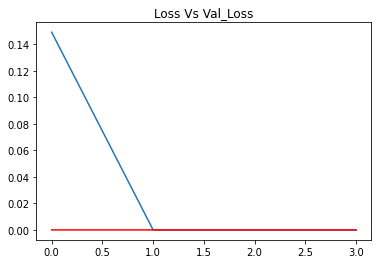

In [50]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('Loss Vs Val_Loss')
plt.show()

In [51]:
from tensorflow.keras.preprocessing import image

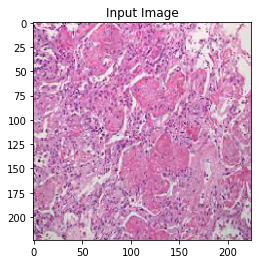

1/1 [==============================] - 0s 22ms/step
Normal Lungs


In [61]:
path = "/content/val/lung_nor/lung_nor1 - Copy (12) - Copy.jpg"
img = image.load_img(path, target_size=(224,224))

x = image.img_to_array(img)

y = image.img_to_array(img)/255
plt.imshow(y)
plt.title("Input Image")
plt.show()



x = np.expand_dims(x, axis=0)

img_data = preprocess_input(x)

classes = model.predict(img_data)

if(classes == 1):
  print("Normal Lungs")
else:
  print("Cancer affected Lungs")